In [31]:
torch.cuda.is_available()

True

In [33]:
try:
    import detectron2
except:
    import os 
    os.system('pip install git+https://github.com/facebookresearch/detectron2.git')

from matplotlib.pyplot import axis
#import gradio as gr
import requests
import numpy as np
from torch import nn
import requests

import torch
import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode

model_path = 'model_final.pth'

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = model_path


# if not torch.cuda.is_available():
#     cfg.MODEL.DEVICE='cpu'

#I am running this on cpu
cfg.MODEL.DEVICE='cpu'
    
predictor = DefaultPredictor(cfg)
my_metadata = MetadataCatalog.get("car_dataset_val")
my_metadata.thing_classes = ["damage"]
    

In [34]:
import numpy as np

In [35]:
def inference(image):
    print(image.height)

    height = image.height

    # img = np.array(image.resize((500, height)))
    img = np.array(image)
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1],
                   metadata=my_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.SEGMENTATION   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    v = Visualizer(img,scale=1.2)
    #print(outputs["instances"].to('cpu'))
    
    print("Type of output ",type(outputs["instances"]))
    
    out = v.draw_instance_predictions(outputs["instances"])
    
    return out.get_image()[:, :, ::-1]

In [37]:
from PIL import Image

image = './car_image.jpg'

i = Image.open(image)

dent = inference(i)

408
Type of output  <class 'detectron2.structures.instances.Instances'>


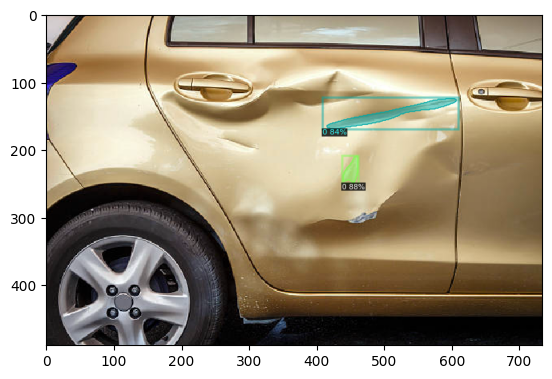

In [38]:
import matplotlib.pyplot as plt
plt.imshow(dent)

# Streamlit

In [ ]:
import streamlit as st
from PIL import Image
import numpy as np

# Import your custom model for image processing
# Replace this with your actual model code
def process_image(input_image):
    # Replace this with your actual image processing logic
    processed_image = np.array(input_image)
    return processed_image

def main():
    st.title("Image Processing App")

    # Upload image through Streamlit
    uploaded_file = st.file_uploader("Choose a file", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Display the uploaded image
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image", use_column_width=True)

        # Process the image using your custom model
        processed_image = process_image(image)

        # Display the processed image
        st.image(processed_image, caption="Processed Image", use_column_width=True)

if __name__ == "__main__":
    main()


In [ ]:
# Gradio (not working)

In [ ]:
title = "Detectron2 Car Scratch Detection"
description = "This demo introduces an interactive playground for our trained Detectron2 model."

gr.Interface(
    inference, 
    [gr.inputs.Image(type="pil", label="Input")], 
    gr.outputs.Image(type="numpy", label="Output"),
    title=title,
    description=description,
    examples=[]).launch()